# Logistic  Regression


Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

<a ><img src="https://cdn-images-1.medium.com/max/1436/1*_TqRJ9SmwFzRigJhMiN2uw.png" width = 500 title="source: imgur.com" /></a>

You will remember that this is the equation which is used to find the equation of the best fitting line on our dataset. But logistic regression deals with the **probabilities** instead of **values**. So we put in our value in the sigmoid function which fetches us the probability between 0-1.



<a><img src="https://media.licdn.com/dms/image/C5612AQF1JgTTKIHVMw/article-cover_image-shrink_600_2000/0/1520136698297?e=2147483647&v=beta&t=sDN_IxQlI9xMBcywNKtm2wGwd7vbIygye7vgGKAyWV4" width = 500 title="source: imgur.com" /></a>  



Reference: [Logistic Regression](https://towardsdatascience.com/understanding-logistic-regression-step-by-step-704a78be7e0a#:~:text=Let's%20start%20by%20defining%20the,Logistic%20regression%20cost%20function.)

Let's take an example to explain Logistic Regression.

# Step 1 : Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Step 2 : Data Read

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer.csv to breast_cancer.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['breast_cancer.csv']))
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


#Step 3 : Data Preprocessing


## Checking for null values


In [ ]:
df.isnull().sum()*100/df.shape[0]

Clump Thickness                0.0
Uniformity of Cell Size        0.0
Uniformity of Cell Shape       0.0
Marginal Adhesion              0.0
Single Epithelial Cell Size    0.0
Bare Nuclei                    0.0
Bland Chromatin                0.0
Normal Nucleoli                0.0
Mitoses                        0.0
Class                          0.0
dtype: float64

Since they aren't any null values, we can proceed further.

# Step 4 : Data Analysis

## Scatter Plot


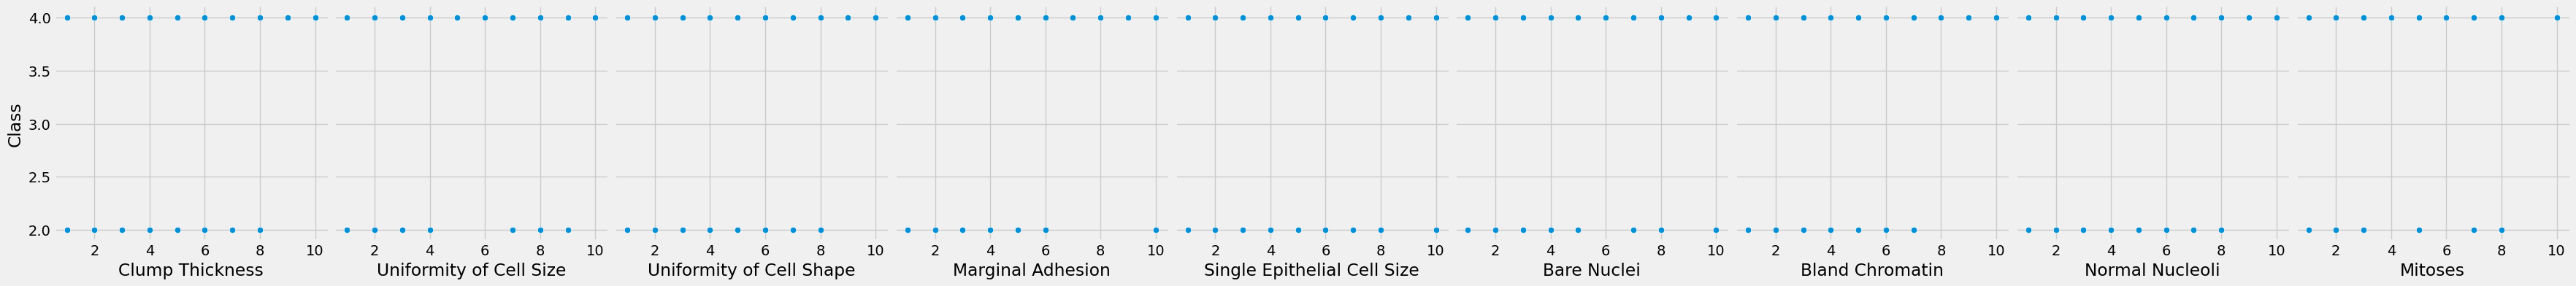

In [ ]:
sns.pairplot(df, x_vars=['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses'], y_vars='Class', height=4, aspect=1, kind='scatter')
plt.show()

Since the outcome is either ` class 2` or `class 4`, one can observe the scatter plot plotting `2` and `4` only for features in the Dataset

## Correlation Matrix

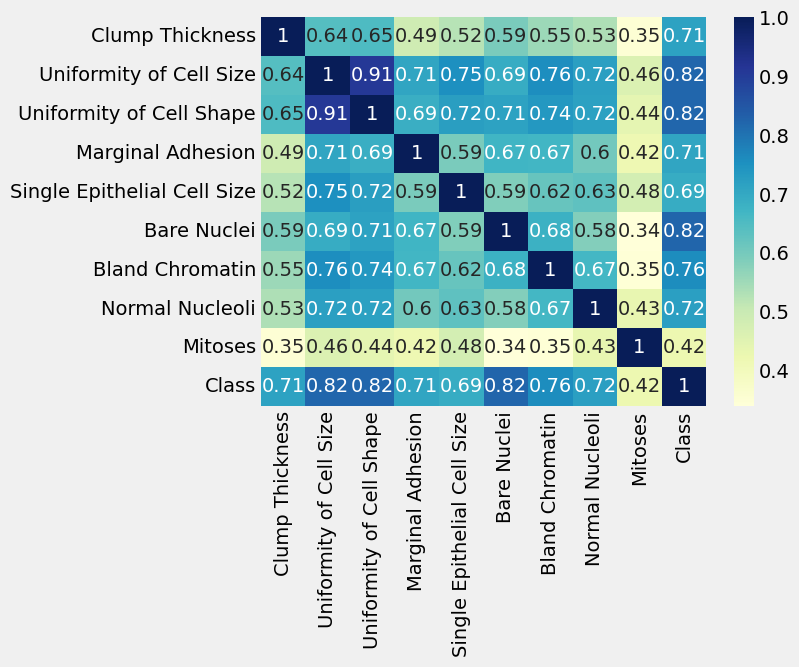

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()


# Step 5 : Model Fitting



In [ ]:
y = df['Class'] ## Outcome varible 'y' is the Class feature.
X = df.drop('Class',axis=1) ## 'x' stores the remaining features.


## Train Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
307,7,6,3,2,5,10,7,4,6
575,4,10,8,5,4,1,10,1,1
433,1,1,1,1,1,1,1,1,1
174,1,1,1,1,1,1,3,1,1
596,5,10,10,10,5,2,8,5,1


In [ ]:
y_train.head()

307    4
575    4
433    2
174    2
596    4
Name: Class, dtype: int64

# Step 5 : Model Fitting



In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

# Step 6 : Model Evaluation

There are also few performance metrics other than accuracy :


1.   Precision = $\frac{TP}{TP+FP}$
2.   Recall = $\frac{TP}{TP+FN}$
3.   F1-Score = $\frac{2*Precision*Recall}{Precision+Recall}$


*`TP` Stands for* **True Positives**
<br>
*`FP` stands for* **False Positives**
<br>
*`TN` Stands for* **True Negatives**
<br>
*`FN` stands for* **False Negatives**





Different types of averaging:
1.  **Micro-Averaging**: <br>
    The micro-average precision and recall score is calculated from the individual classes  `true positives (TPs), true negatives (TNs), false positives (FPs), `and` false negatives (FNs)` of the model. It aggregates the contributions of all classes to compute the average metric and weights each sample equally.

  *Micro-Average-Precision* = $\frac{TP_{feature_1}+TP_{feature_2}+TP_{feature_3}....TP_{feature_n}}{(TP_{feature_1}+TP_{feature_2}+TP_{feature_3}....TP_{feature_n}) +(FP_{feature_1}+FP_{feature_2}+FP_{feature_3}....FP_{feature_n})}$

   *Micro-Average-Recall* = $\frac{TP_{feature_1}+TP_{feature_2}+TP_{feature_3}....TP_{feature_n}}{(TP_{feature_1}+TP_{feature_2}+TP_{feature_3}....TP_{feature_n}) +(FN_{feature_1}+FN_{feature_2}+FN_{feature_3}....FN_{feature_n})}$

2.  **Macro-Averaging**:<br>
    The macro-average precision and recall scores are calculated as arithmetic mean of individual classes precision and recall scores. Macro-average deals with aggregates or totals and studies the metrics as a whole.

  *Macro-Average-Precision* = $\frac{Precision_{feature_1}+Precision_{feature_2}......+Precision_{feature_n}}{n}$

  *Macro-Average-Recall* = $\frac{Recall_{feature_1}+Recall_{feature_2}......+Recall_{feature_n}}{n}$
  

 3. **Weighted-Averaging**
    Each data point value in a weighted average is multiplied by the assigned weight, which is then summed and divided by the number of data points. The final average number reflects the relative importance of each observation and is thus more descriptive than a simple average.

  *Weighted_average* = $\frac{\sum (WeightOfDataPoint_{feature_i} DataPointValue_{feature_i})}{\sum WeightOfDataPoint_{feature_i} }$

In [ ]:
y_pred = classifier.predict(X_test)

The predicted cancer stage values for the breast cancer using Logistic Regression

In [ ]:
y_pred

array([2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4,
       2, 4, 2, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 2])

`Note: Here, class 2 was considered as 0 or False and similarly class 4 was considered as 1 or True.`


Since this is a classification  dataset.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97       130
           4       0.96      0.93      0.95        75

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



***But, what does confusion matrix convey us in logistic regression??***

A confusion matrix is a layout of different outcomes of `Predictions`and `Results` in a classification problem.

<a><img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/confusion-matrix.JPG"  /></a>

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
con_mat

array([[127,   3],
       [  5,  70]])

#Conclusion

Thus, by looking at the matrix obtained,



1.   The number of samples predicted **TRUE** i.e `2`  given **TRUE** i.e `2` are 127(TP).

2.   The number of samples predicted **FALSE** i.e  `4` given **FALSE** i.e `4` are 70(TN).


3.  The number of samples predicted **TRUE** i.e `2` instead of **FALSE** i.e  `4` are 3(FP).

4.  The number of samples predicted **FALSE** i.e `4` instead of **TRUE** i.e  `2` are 5(FN).





